In [92]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.utils import to_categorical, plot_model
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l1, l2, l1_l2
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [93]:
dataset = pd.read_csv('data.csv')

X = dataset.iloc[:,2:32] # [all rows, col from index 2 to the last one excluding 'Unnamed: 32']
y = dataset.iloc[:,1] # [all rows, col one only which contains the classes of cancer]

y = LabelEncoder().fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [94]:
# Tranform training labels to one-hot encoding
y_train = np_utils.to_categorical(y_train, 2)

# Tranform test labels to one-hot encoding
y_test = np_utils.to_categorical(y_test, 2)

In [95]:
model = Sequential()

classes = 2
neurons = [128,128]
hidden_layers = 2
epochs = 500

# Camada de entrada
model.add(Dense(units=64, activation='sigmoid', input_dim=30))

model.add(Dropout(0.2))
# Camadas escondidas
for i in range(hidden_layers):
    model.add(Dense(units=neurons[i], activation='sigmoid', activity_regularizer=l1_l2(l1=0.01, l2=0.01)))

# Camada de saída
model.add(Dense(units=classes, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,epochs=epochs, batch_size = 30, validation_data=(X_test, y_test))
loss, accuracy = model.evaluate(X_test, y_test)

Train on 455 samples, validate on 114 samples
Epoch 1/500
455/455 [==============================] - 1s 3ms/step - loss: 41.7290 - acc: 0.6154 - val_loss: 31.4639 - val_acc: 0.5877
Epoch 2/500
455/455 [==============================] - 0s 187us/step - loss: 28.6657 - acc: 0.6374 - val_loss: 24.1158 - val_acc: 0.5877
Epoch 3/500
455/455 [==============================] - 0s 188us/step - loss: 22.7829 - acc: 0.6374 - val_loss: 19.8404 - val_acc: 0.5877
Epoch 4/500
455/455 [==============================] - 0s 190us/step - loss: 19.0925 - acc: 0.6374 - val_loss: 16.9319 - val_acc: 0.5877
Epoch 5/500
455/455 [==============================] - 0s 195us/step - loss: 16.4769 - acc: 0.6374 - val_loss: 14.7980 - val_acc: 0.5877
Epoch 6/500
455/455 [==============================] - 0s 180us/step - loss: 14.5146 - acc: 0.6374 - val_loss: 13.1512 - val_acc: 0.5877
Epoch 7/500
455/455 [==============================] - 0s 190us/step - loss: 12.9926 - acc: 0.6374 - val_loss: 11.8483 - val_acc: 0.58

Epoch 61/500
455/455 [==============================] - 0s 188us/step - loss: 2.3180 - acc: 0.7692 - val_loss: 2.1464 - val_acc: 0.7807
Epoch 62/500
455/455 [==============================] - 0s 157us/step - loss: 2.2713 - acc: 0.7758 - val_loss: 2.1366 - val_acc: 0.7632
Epoch 63/500
455/455 [==============================] - 0s 187us/step - loss: 2.2474 - acc: 0.7780 - val_loss: 2.0912 - val_acc: 0.7982
Epoch 64/500
455/455 [==============================] - 0s 162us/step - loss: 2.2428 - acc: 0.8044 - val_loss: 2.0657 - val_acc: 0.8246
Epoch 65/500
455/455 [==============================] - 0s 188us/step - loss: 2.2015 - acc: 0.8000 - val_loss: 2.0458 - val_acc: 0.8772
Epoch 66/500
455/455 [==============================] - 0s 171us/step - loss: 2.1741 - acc: 0.8110 - val_loss: 2.0066 - val_acc: 0.7982
Epoch 67/500
455/455 [==============================] - 0s 177us/step - loss: 2.1614 - acc: 0.7912 - val_loss: 1.9905 - val_acc: 0.8860
Epoch 68/500
455/455 [==========================

455/455 [==============================] - 0s 213us/step - loss: 1.2621 - acc: 0.9495 - val_loss: 1.1598 - val_acc: 0.9649
Epoch 122/500
455/455 [==============================] - 0s 187us/step - loss: 1.2651 - acc: 0.9165 - val_loss: 1.1551 - val_acc: 0.9649
Epoch 123/500
455/455 [==============================] - 0s 171us/step - loss: 1.2651 - acc: 0.9121 - val_loss: 1.1384 - val_acc: 0.9649
Epoch 124/500
455/455 [==============================] - 0s 165us/step - loss: 1.2169 - acc: 0.9560 - val_loss: 1.1555 - val_acc: 0.9649
Epoch 125/500
455/455 [==============================] - 0s 176us/step - loss: 1.2352 - acc: 0.9187 - val_loss: 1.1229 - val_acc: 0.9649
Epoch 126/500
455/455 [==============================] - 0s 180us/step - loss: 1.2236 - acc: 0.9319 - val_loss: 1.1108 - val_acc: 0.9737
Epoch 127/500
455/455 [==============================] - 0s 187us/step - loss: 1.2023 - acc: 0.9275 - val_loss: 1.1239 - val_acc: 0.9649
Epoch 128/500
455/455 [==============================] 

Epoch 181/500
455/455 [==============================] - 0s 182us/step - loss: 0.8349 - acc: 0.9648 - val_loss: 0.7885 - val_acc: 0.9737
Epoch 182/500
455/455 [==============================] - 0s 193us/step - loss: 0.8451 - acc: 0.9582 - val_loss: 0.8133 - val_acc: 0.9649
Epoch 183/500
455/455 [==============================] - 0s 173us/step - loss: 0.8301 - acc: 0.9736 - val_loss: 0.7695 - val_acc: 0.9561
Epoch 184/500
455/455 [==============================] - 0s 180us/step - loss: 0.8412 - acc: 0.9648 - val_loss: 0.7673 - val_acc: 0.9561
Epoch 185/500
455/455 [==============================] - 0s 186us/step - loss: 0.8286 - acc: 0.9516 - val_loss: 0.7713 - val_acc: 0.9737
Epoch 186/500
455/455 [==============================] - 0s 218us/step - loss: 0.8196 - acc: 0.9648 - val_loss: 0.7814 - val_acc: 0.9649
Epoch 187/500
455/455 [==============================] - 0s 183us/step - loss: 0.8286 - acc: 0.9648 - val_loss: 0.7801 - val_acc: 0.9649
Epoch 188/500
455/455 [==================

Epoch 241/500
455/455 [==============================] - 0s 214us/step - loss: 0.6105 - acc: 0.9802 - val_loss: 0.6065 - val_acc: 0.9649
Epoch 242/500
455/455 [==============================] - 0s 221us/step - loss: 0.6056 - acc: 0.9780 - val_loss: 0.6077 - val_acc: 0.9649
Epoch 243/500
455/455 [==============================] - 0s 197us/step - loss: 0.6225 - acc: 0.9780 - val_loss: 0.6141 - val_acc: 0.9649
Epoch 244/500
455/455 [==============================] - 0s 211us/step - loss: 0.5934 - acc: 0.9846 - val_loss: 0.5905 - val_acc: 0.9737
Epoch 245/500
455/455 [==============================] - 0s 188us/step - loss: 0.5966 - acc: 0.9824 - val_loss: 0.5911 - val_acc: 0.9737
Epoch 246/500
455/455 [==============================] - 0s 200us/step - loss: 0.5956 - acc: 0.9868 - val_loss: 0.5857 - val_acc: 0.9737
Epoch 247/500
455/455 [==============================] - 0s 218us/step - loss: 0.6059 - acc: 0.9736 - val_loss: 0.5847 - val_acc: 0.9737
Epoch 248/500
455/455 [==================

Epoch 301/500
455/455 [==============================] - 0s 197us/step - loss: 0.4692 - acc: 0.9912 - val_loss: 0.4908 - val_acc: 0.9737
Epoch 302/500
455/455 [==============================] - 0s 151us/step - loss: 0.4741 - acc: 0.9846 - val_loss: 0.4795 - val_acc: 0.9649
Epoch 303/500
455/455 [==============================] - 0s 171us/step - loss: 0.4686 - acc: 0.9846 - val_loss: 0.4900 - val_acc: 0.9737
Epoch 304/500
455/455 [==============================] - 0s 183us/step - loss: 0.4650 - acc: 0.9890 - val_loss: 0.4920 - val_acc: 0.9737
Epoch 305/500
455/455 [==============================] - 0s 178us/step - loss: 0.4683 - acc: 0.9890 - val_loss: 0.4773 - val_acc: 0.9649
Epoch 306/500
455/455 [==============================] - 0s 189us/step - loss: 0.4608 - acc: 0.9846 - val_loss: 0.4814 - val_acc: 0.9737
Epoch 307/500
455/455 [==============================] - 0s 172us/step - loss: 0.4540 - acc: 0.9868 - val_loss: 0.4884 - val_acc: 0.9649
Epoch 308/500
455/455 [==================

Epoch 361/500
455/455 [==============================] - 0s 183us/step - loss: 0.3691 - acc: 0.9868 - val_loss: 0.4009 - val_acc: 0.9737
Epoch 362/500
455/455 [==============================] - 0s 153us/step - loss: 0.3724 - acc: 0.9824 - val_loss: 0.4032 - val_acc: 0.9737
Epoch 363/500
455/455 [==============================] - 0s 177us/step - loss: 0.3734 - acc: 0.9868 - val_loss: 0.4171 - val_acc: 0.9649
Epoch 364/500
455/455 [==============================] - 0s 183us/step - loss: 0.3667 - acc: 0.9868 - val_loss: 0.3989 - val_acc: 0.9737
Epoch 365/500
455/455 [==============================] - 0s 216us/step - loss: 0.3647 - acc: 0.9890 - val_loss: 0.3988 - val_acc: 0.9737
Epoch 366/500
455/455 [==============================] - 0s 203us/step - loss: 0.3678 - acc: 0.9890 - val_loss: 0.4038 - val_acc: 0.9737
Epoch 367/500
455/455 [==============================] - 0s 182us/step - loss: 0.3679 - acc: 0.9868 - val_loss: 0.3912 - val_acc: 0.9649
Epoch 368/500
455/455 [==================

Epoch 421/500
455/455 [==============================] - 0s 223us/step - loss: 0.3056 - acc: 0.9912 - val_loss: 0.3390 - val_acc: 0.9737
Epoch 422/500
455/455 [==============================] - 0s 235us/step - loss: 0.3049 - acc: 0.9868 - val_loss: 0.3387 - val_acc: 0.9737
Epoch 423/500
455/455 [==============================] - 0s 198us/step - loss: 0.2990 - acc: 0.9912 - val_loss: 0.3370 - val_acc: 0.9737
Epoch 424/500
455/455 [==============================] - 0s 236us/step - loss: 0.3023 - acc: 0.9890 - val_loss: 0.3349 - val_acc: 0.9737
Epoch 425/500
455/455 [==============================] - 0s 206us/step - loss: 0.2959 - acc: 0.9912 - val_loss: 0.3355 - val_acc: 0.9737
Epoch 426/500
455/455 [==============================] - 0s 255us/step - loss: 0.3011 - acc: 0.9912 - val_loss: 0.3383 - val_acc: 0.9737
Epoch 427/500
455/455 [==============================] - 0s 215us/step - loss: 0.2964 - acc: 0.9912 - val_loss: 0.3335 - val_acc: 0.9737
Epoch 428/500
455/455 [==================

Epoch 481/500
455/455 [==============================] - 0s 252us/step - loss: 0.2622 - acc: 0.9912 - val_loss: 0.3000 - val_acc: 0.9737
Epoch 482/500
455/455 [==============================] - 0s 211us/step - loss: 0.2599 - acc: 0.9912 - val_loss: 0.2972 - val_acc: 0.9737
Epoch 483/500
455/455 [==============================] - 0s 233us/step - loss: 0.2580 - acc: 0.9912 - val_loss: 0.2976 - val_acc: 0.9737
Epoch 484/500
455/455 [==============================] - 0s 265us/step - loss: 0.2611 - acc: 0.9868 - val_loss: 0.2978 - val_acc: 0.9737
Epoch 485/500
455/455 [==============================] - 0s 225us/step - loss: 0.2622 - acc: 0.9890 - val_loss: 0.2987 - val_acc: 0.9737
Epoch 486/500
455/455 [==============================] - 0s 233us/step - loss: 0.2591 - acc: 0.9890 - val_loss: 0.2977 - val_acc: 0.9737
Epoch 487/500
455/455 [==============================] - 0s 228us/step - loss: 0.2573 - acc: 0.9890 - val_loss: 0.2960 - val_acc: 0.9737
Epoch 488/500
455/455 [==================

In [100]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_73 (Dense)             (None, 64)                1984      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_74 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_75 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_76 (Dense)             (None, 2)                 258       
Total params: 27,074
Trainable params: 27,074
Non-trainable params: 0
_________________________________________________________________


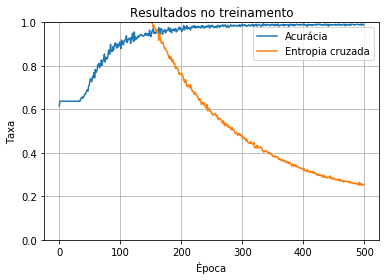

In [101]:
def print_train_results(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['loss'])
    plt.title('Resultados no treinamento')
    plt.ylabel('Taxa')
    plt.xlabel('Época')
    plt.legend(['Acurácia', 'Entropia cruzada'], loc='best')
    plt.grid()
    plt.ylim((0, 1)) 
    plt.show()
print_train_results(history)

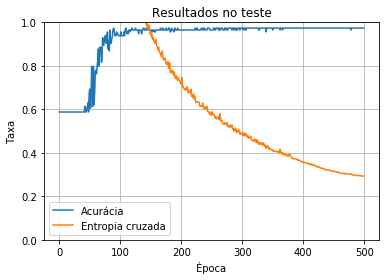

In [102]:
def print_test_results(history):
    plt.plot(history.history['val_acc'])
    plt.plot(history.history['val_loss'])
    plt.title('Resultados no teste')
    plt.ylabel('Taxa')
    plt.xlabel('Época')
    plt.legend(['Acurácia', 'Entropia cruzada'], loc='best')
    plt.grid()
    plt.ylim((0, 1)) 
    plt.show()
    
print_test_results(history)

In [103]:
print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

Test loss: 0.3
Test accuracy: 0.974


In [104]:
history.history

{'val_loss': [31.463930230391654,
  24.115793730083265,
  19.840398688065378,
  16.931888781095807,
  14.797993409006219,
  13.1511600393998,
  11.848265447114644,
  10.79101165972258,
  9.906740188598633,
  9.160740250035337,
  8.525725214104904,
  7.976768895199425,
  7.503120071009586,
  7.079123045268812,
  6.703407287597656,
  6.380330763365093,
  6.073481258593108,
  5.823738549884997,
  5.563682756925884,
  5.347049035524067,
  5.132615616447048,
  4.950852870941162,
  4.771839141845703,
  4.6086548504076505,
  4.458601324181807,
  4.3291443523607755,
  4.219645726053338,
  4.08529173700433,
  3.9671525955200195,
  3.8537335270329525,
  3.769636969817312,
  3.668401893816496,
  3.5756520095624422,
  3.4854775227998434,
  3.4042679259651587,
  3.3283975249842594,
  3.2725306937569068,
  3.190411316721063,
  3.1219982097023413,
  3.068656432001214,
  2.9944855413938822,
  2.9356072701905904,
  2.8889840778551603,
  2.8385772705078125,
  2.779876997596339,
  2.7228557436089766,
  2